<a href="https://colab.research.google.com/github/Victor0vich/Denis/blob/main/Part1_scores_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Работа с таблицами. Основы работы с датафреймами в pandas

Библиотека pandas используется для удобной и более эффективной работы с таблицами. Её функционал достаточно разнообразен, но давайте начнем с каких-то базовых функций и методов.

Для начала импортируем саму библиотеку.

In [ ]:
import pandas as pd

In [ ]:
!pip install pandas #если не импортировалась

Здесь мы использовали такой приём: импортировали библиотеку и присвоили ей сокращённое имя, которое будет использоваться в пределах данного ipynb-файла. Чтобы не писать перед каждой библиотечной функцией длинное `pandas`. и не импортировать сразу все функции из этой библиотеки, мы сократили название до `pd`, и в дальнейшем Python будет понимать, что мы имеем в виду. Можно было бы сократить и до `p`, но тогда есть риск забыть про это и создать переменную с таким же именем, что в какой-то момент приведёт к проблемам. К тому же `pd` – распространенное сокращение.

### Загрузка таблицы из файла и описание переменных
А теперь давайте загрузим какую-нибудь реальную базу данных из файла. Библиотека `pandas` достаточно гибкая, она позволяет загружать данные из файлов разных форматов. Пока остановимся на самом простом – файле csv, что расшифровывается как *comma separated values*. Столбцы в таком файле по умолчанию отделяются друг от друга запятой. Например, такая таблица

In [ ]:
df = pd.DataFrame([[1, 4, 9], [4, 8, 6], [9, 8, 7]])

In [ ]:
df

,0,1,2
0,1,4,9
1,4,8,6
2,9,8,7


Но так происходит не всегда, иногда значения отделяются не запятой. В таких случаях нам потребуется дополнительно выставлять параметр `sep = ";"`, чтобы Python понимал, как правильно отделять один столбец от другого.  Пока загрузим файл по ссылке: пропишем путь к нему внутри функции `read_csv()` из библиотеки `pandas`. Плюс, сделаем так, чтобы первый столбец (с индексом 0) был использован в качестве названий строк (строки будут иметь не номер от 0 до N, а названия, которые мы захотим, важно только, чтобы они все были уникальными, без повторов).

Иногда такой подход может быть полезен. Представьте, что все переменные в таблице, кроме *id*, измерены в количественной шкале, и мы планируем реализовать на них статистический метод, который работает исключительно с числовыми данными. Если мы просто выкинем столбец с *id*, мы потеряем информацию о наблюдении, если мы его оставим, нам придется собирать в отдельную таблицу показатели, к которым будем применять метод, так как сохраненный в исходной таблице текст будет мешать. Если же мы назовем строки в соответствии с *id*, мы убьем сразу двух зайцев: избавимся от столбца с текстом и не потеряем информацию о наблюдении (код, имя респондента, название страны и прочее).

В файле `scores2.csv` сохранены оценки студентов-политологов по ряду курсов. Оценки реальные, взяты из кумулятивного рейтинга, но имена студентов зашифрованы – вместо них задействованы номера студенческих билетов. Посмотрим на датафрейм:

In [ ]:
df = pd.read_csv('scores2.csv', sep = ',', index_col = 0)
df

,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1
М141БПЛТЛ017,9,9,8,8,9,9,10,6.0,9,9,9,8.0,8,8.0,8,9,0
М141БПЛТЛ069,10,10,10,10,10,10,9,8.0,8,10,9,7.0,6,5.0,8,10,1
М141БПЛТЛ072,10,9,8,10,9,8,9,8.0,8,10,9,7.0,8,8.0,9,9,0
М141БПЛТЛ020,8,7,7,6,9,10,8,8.0,7,7,9,7.0,8,6.0,8,9,1
М141БПЛТЛ026,7,10,8,7,10,7,9,8.0,8,8,8,8.0,8,7.0,7,8,0
М141БПЛТЛ073,7,9,8,8,9,8,9,8.0,8,9,9,7.0,7,6.0,10,9,1


Так как в нашем случае таблица не очень большая, Python вывел её на экран полностью. Если строк или столбцов было бы слишком много, Python вывел бы несколько первых и последних, а в середине бы поставил многоточие.

**Описание показателей (переменных):**

* `id` – номер студенческого билета;
* `catps` – оценка по курсу *Категории политической науки*;
* `mstat` – оценка по курсу *Математика и статистика*;
* `soc` – оценка по курсу *Социология*;
* `econ` – оценка по курсу *Экономика*;
* `eng` – оценка по курсу *Английский язык*;
* `polth` – оценка по курсу *История политических учений*;
* `mstat2` – оценка по курсу *Математика и статистика (часть 2)*;
* `phist` – оценка по курсу *Политическая история*;
* `law` – оценка по курсу *Право*;
* `phil` – оценка по курсу *Философия*;
* `polsoc` – оценка по курсу *Политическая социология*;
* `ptheo` – оценка по курсу *Политическая теория*;
* `preg` – оценка по курсу *Политическая регионалистика*;
* `compp` – оценка по курсу *Сравнительная политика*;
* `game` – оценка по курсу *Теория игр*;
* `wpol` – оценка по курсу *Мировая политика и международные отношения*;
* `male` – пол (1 ‒ мужской, 0 ‒ женский).

Получим сводную информацию по таблице:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, М141БПЛТЛ024 to 13051038
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   catps   60 non-null     int64  
 1   mstat   60 non-null     int64  
 2   soc     60 non-null     int64  
 3   econ    60 non-null     int64  
 4   eng     60 non-null     int64  
 5   polth   60 non-null     int64  
 6   mstat2  60 non-null     int64  
 7   phist   59 non-null     float64
 8   law     60 non-null     int64  
 9   phil    60 non-null     int64  
 10  polsoc  60 non-null     int64  
 11  ptheo   58 non-null     float64
 12  preg    60 non-null     int64  
 13  compp   57 non-null     float64
 14  game    60 non-null     int64  
 15  wpol    60 non-null     int64  
 16  male    60 non-null     int64  
dtypes: float64(3), int64(14)
memory usage: 8.4+ KB


Какую информацию выдал метод `.info()`? Во-первых, он сообщил нам, что `df` является объектом `DataFrame`. Во-вторых, он вывел число строк (60 entries) и показал их индексы (0 to 59). В-третьих, он вывел число столбцов (total 18 columns). Наконец, он выдал информацию по каждому столбцу. Остановимся на этом поподробнее.

В выдаче выше представлено, сколько непустых элементов содержится в каждом столбце. Непустые элементы non-null – это всё, кроме пропущенных значений, которые кодируются особым образом (`NaN` – от *Not A Number*). В нашей таблице есть столбцы, которые заполнены неполностью.

Далее указан тип каждого столбца, целочисленный `int64` и строковый `object`. Что означают числа в конце? Это объем памяти, который требуется для хранения.

Сводную статистическую информацию можно получить с помощью метода `.describe()`.

In [ ]:
df.describe()

В случае количественных показателей этот метод возвращает таблицу с основными описательными статистиками:

* `count` – число непустых (заполненных) значений
* `mean` – среднее арифметическое
* `std` – стандартное отклонение (показатель разброса данных относительно среднего значения)
* `min` – минимальное значение
* `max` – максимальное значение
* `25%` – нижний квартиль (значение, которое 25% значений не превышают)
* `50%` – медиана (значение, которое 50% значений не превышают)
* `75%` – верхний квартиль (значение, которое 75% значений не превышают)

### Series: столбец в датафрейме

Посмотрим на структуру таблицы более внимательно. Выберем первый столбец `catps`:

In [ ]:
type(df['catps'])

pandas.core.series.Series

In [ ]:
df['catps']

,catps
id,
М141БПЛТЛ024,7
М141БПЛТЛ031,8
М141БПЛТЛ075,9
М141БПЛТЛ017,9
М141БПЛТЛ069,10
М141БПЛТЛ072,10
М141БПЛТЛ020,8
М141БПЛТЛ026,7
М141БПЛТЛ073,7


In [ ]:
df['catps']['М141БПЛТЛ074']

np.int64(5)

Столбец датафрейма `df` имеет особый тип *Series*. Внешне *Series* отличается от обычного списка значений, потому что, во-первых, при вызове столбца на экран выводятся не только сами элементы, но их номер (номер строки), а во-вторых, на экран выводится строка с названием столбца (`Name: id`) и его тип (`dtype: object`, текстовый). Первая особенность роднит *Series* со словарями: он представляет собой пары *ключ-значение*, то есть *номер-значение*. Вторая особенность роднит *Series* с массивами `numpy`: элементы обычно должны быть одного типа.

### Операции с таблицами

Можно вывести первые или последние строки таблицы, используя методы `.head()` и `.tail()`.

In [ ]:
df.head(3)

,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1


In [ ]:
df.tail(3)

,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ005,5,7,5,5,7,4,7,4.0,5,4,5,5.0,4,4.0,4,8,1
М141БПЛТЛ044,4,5,7,4,6,4,4,5.0,4,4,4,4.0,6,NaN,5,5,1
13051038,5,4,4,4,9,5,5,5.0,5,4,4,NaN,7,4.0,4,4,1


In [ ]:
df.sample(3)

,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ006,6,5,6,5,8,5,5,5.0,6,4,7,5.0,7,5.0,6,8,0
М141БПЛТЛ038,7,9,6,4,9,6,7,6.0,7,4,8,4.0,5,4.0,9,7,1
М141БПЛТЛ053,6,7,7,5,9,8,7,8.0,8,6,8,7.0,8,6.0,9,9,0


**Внимание:** это просто первые и последние строки таблицы «как есть». Никакой сортировки не происходит!

По умолчанию эти методы выводят пять строк, но при желании это легко изменить. Достаточно в скобках указать желаемое число строк.

In [ ]:
df.head(10) # первые 10 строк

Когда таблица большая, увидеть все столбцы разом не получится. Поэтому полезно знать, как получить список названий столбцов.

In [ ]:
df.columns

Index(['catps', 'mstat', 'soc', 'econ', 'eng', 'polth', 'mstat2', 'phist',
       'law', 'phil', 'polsoc', 'ptheo', 'preg', 'compp', 'game', 'wpol',
       'male'],
      dtype='object')

In [ ]:
df.columns[5]

'polth'

Обратите внимание: полученный объект не является обычным списком:

In [ ]:
type(df.columns) # это Index из pandas

Чтобы получить список названий, достаточно сконвертировать тип с помощью привычного `list()`:

In [ ]:
c = list(df.columns)
print(c)

['catps', 'mstat', 'soc', 'econ', 'eng', 'polth', 'mstat2', 'phist', 'law', 'phil', 'polsoc', 'ptheo', 'preg', 'compp', 'game', 'wpol', 'male']


Аналогичная история со строками:

In [ ]:
df.index

Index(['М141БПЛТЛ024', 'М141БПЛТЛ031', 'М141БПЛТЛ075', 'М141БПЛТЛ017',
       'М141БПЛТЛ069', 'М141БПЛТЛ072', 'М141БПЛТЛ020', 'М141БПЛТЛ026',
       'М141БПЛТЛ073', 'М141БПЛТЛ078', 'М141БПЛТЛ060', 'М141БПЛТЛ040',
       'М141БПЛТЛ065', 'М141БПЛТЛ053', 'М141БПЛТЛ015', 'М141БПЛТЛ021',
       'М141БПЛТЛ018', 'М141БПЛТЛ039', 'М141БПЛТЛ036', 'М141БПЛТЛ049',
       '06114043', 'М141БПЛТЛ048', 'М141БПЛТЛ034', 'М141БПЛТЛ045',
       'М141БПЛТЛ033', 'М141БПЛТЛ083', 'М141БПЛТЛ008', 'М141БПЛТЛ001',
       'М141БПЛТЛ038', 'М141БПЛТЛ052', 'М141БПЛТЛ011', 'М141БПЛТЛ004',
       'М141БПЛТЛ010', 'М141БПЛТЛ071', 'М141БПЛТЛ035', 'М141БПЛТЛ030',
       'М141БПЛТЛ070', 'М141БПЛТЛ051', 'М141БПЛТЛ046', 'М141БПЛТЛ047',
       'М141БПЛТЛ063', 'М141БПЛТЛ029', 'М141БПЛТЛ064', 'М141БПЛТЛ076',
       'М141БПЛТЛ062', 'М141БПЛТЛ074', '130232038', 'М141БПЛТЛ023',
       'М141БПЛТЛ054', 'М141БПЛТЛ012', 'М141БПЛТЛ006', 'М141БПЛТЛ055',
       'М141БПЛТЛ007', 'М141БПЛТЛ050', 'М141БПЛТЛ066', 'М141БПЛТЛ043',
       'М141Б

In [ ]:
list(df.index)

['М141БПЛТЛ024',
 'М141БПЛТЛ031',
 'М141БПЛТЛ075',
 'М141БПЛТЛ017',
 'М141БПЛТЛ069',
 'М141БПЛТЛ072',
 'М141БПЛТЛ020',
 'М141БПЛТЛ026',
 'М141БПЛТЛ073',
 'М141БПЛТЛ078',
 'М141БПЛТЛ060',
 'М141БПЛТЛ040',
 'М141БПЛТЛ065',
 'М141БПЛТЛ053',
 'М141БПЛТЛ015',
 'М141БПЛТЛ021',
 'М141БПЛТЛ018',
 'М141БПЛТЛ039',
 'М141БПЛТЛ036',
 'М141БПЛТЛ049',
 '06114043',
 'М141БПЛТЛ048',
 'М141БПЛТЛ034',
 'М141БПЛТЛ045',
 'М141БПЛТЛ033',
 'М141БПЛТЛ083',
 'М141БПЛТЛ008',
 'М141БПЛТЛ001',
 'М141БПЛТЛ038',
 'М141БПЛТЛ052',
 'М141БПЛТЛ011',
 'М141БПЛТЛ004',
 'М141БПЛТЛ010',
 'М141БПЛТЛ071',
 'М141БПЛТЛ035',
 'М141БПЛТЛ030',
 'М141БПЛТЛ070',
 'М141БПЛТЛ051',
 'М141БПЛТЛ046',
 'М141БПЛТЛ047',
 'М141БПЛТЛ063',
 'М141БПЛТЛ029',
 'М141БПЛТЛ064',
 'М141БПЛТЛ076',
 'М141БПЛТЛ062',
 'М141БПЛТЛ074',
 '130232038',
 'М141БПЛТЛ023',
 'М141БПЛТЛ054',
 'М141БПЛТЛ012',
 'М141БПЛТЛ006',
 'М141БПЛТЛ055',
 'М141БПЛТЛ007',
 'М141БПЛТЛ050',
 'М141БПЛТЛ066',
 'М141БПЛТЛ043',
 'М141БПЛТЛ084',
 'М141БПЛТЛ005',
 'М141БПЛТЛ044',
 '13

### Переименование столбцов и строк

Раз названия столбцов можно вывести в виде некоторого перечня, то этот перечень можно редактировать. Посмотрим на названия столбцов ещё раз.

In [ ]:
df.columns

Index(['catps', 'mstat', 'soc', 'econ', 'eng', 'polth', 'mstat2', 'phist',
       'law', 'phil', 'polsoc', 'ptheo', 'preg', 'compp', 'game', 'wpol',
       'male'],
      dtype='object')

Давайте переименуем переменную `catps` в `cps`, чтобы думать о политической науке, а не о котах :) Для этого сохраним названия в список `my_cols` и изменим в списке первый элемент:

In [ ]:
my_cols = list(df.columns)
my_cols[0] = 'cps'
df.columns = my_cols
df.head()

,cps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1
М141БПЛТЛ017,9,9,8,8,9,9,10,6.0,9,9,9,8.0,8,8.0,8,9,0
М141БПЛТЛ069,10,10,10,10,10,10,9,8.0,8,10,9,7.0,6,5.0,8,10,1


Обратите внимание: для того, чтобы изменить одно или несколько названий, совсем необязательно создавать новый список «с нуля». Достаточно определить индексы нужных элементов и поправить только необходимые названия.

Точно так же можно было поступить со строками. Но давайте лучше попробуем внести изменения в названия всех столбцов: сделаем так, чтобы все названия столбцов начинались с большой буквы. Для начала напишем функцию, которая принимает на вход датафрейм, обращается к его столбцам и переименовывает их, делая первую букву заглавной.

**Важно:** датафреймы являются изменяемой структурой данных (да-да, как списки). Поэтому, применяя некоторые методы к объекту типа `DataFrame` или внося какие-то изменения в ссылку на него, мы меняем исходный датафрейм, и к этому надо быть готовым. Если вы не планируете вносить изменения в исходную базу, имеет смысл сделать её копию и работать с ней. Например, вот так:

In [ ]:
df.head(2)

,cps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1


In [ ]:
df2 = df

In [ ]:
cols = list(df2.columns)
cols[0] = 'aaaaa'
df2.columns = cols
df.head(2)

,aaaaa,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1


In [ ]:
df.head(2)

,aaaaa,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1


In [ ]:
# метод copy
df_new = df.copy()

In [ ]:
cols = list(df_new.columns)
cols[0] = 'bbbbb'
df_new.columns = cols
df_new.head(2)

,bbbbb,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1


In [ ]:
df.head(2)

,aaaaa,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1


**Обратите внимание:** создать копию обычным присваиванием не получится, код вида `df_new = df` создаст новую ссылку на датафрейм, но не новый датафрейм. Поэтому при изменении `df_new` база `df` также изменится (вспомните историю о коварстве списков).

### Выбор столбцов и строк таблицы

**Выбор столбцов по названию**

Часто удобнее всего выбирать столбец по названию. Для этого достаточно указать название столбца в квадратных скобках (и обязательно в кавычках, так как название является строкой):

In [ ]:
my_cols = list(df.columns)
my_cols[0] = 'cps'
df.columns = my_cols
df.head()

,cps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1
М141БПЛТЛ017,9,9,8,8,9,9,10,6.0,9,9,9,8.0,8,8.0,8,9,0
М141БПЛТЛ069,10,10,10,10,10,10,9,8.0,8,10,9,7.0,6,5.0,8,10,1


In [ ]:
df['new_column'] = 0
df.head(2)

,cps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male,new_column
id,,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1,0
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1,0


In [ ]:
del df['new_column']

KeyError: 'new_column'

In [ ]:
df.head()

,cps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
id,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1
М141БПЛТЛ017,9,9,8,8,9,9,10,6.0,9,9,9,8.0,8,8.0,8,9,0
М141БПЛТЛ069,10,10,10,10,10,10,9,8.0,8,10,9,7.0,6,5.0,8,10,1


In [ ]:
df['new_column_2'] = df['male']
df.head()

,cps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male,new_column_2
id,,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1,1
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1,1
М141БПЛТЛ017,9,9,8,8,9,9,10,6.0,9,9,9,8.0,8,8.0,8,9,0,0
М141БПЛТЛ069,10,10,10,10,10,10,9,8.0,8,10,9,7.0,6,5.0,8,10,1,1


Ещё столбец можно выбрать, не используя квадратные скобки, а просто указав его название через точку:

In [ ]:
df.male

,male
id,
М141БПЛТЛ024,1
М141БПЛТЛ031,1
М141БПЛТЛ075,1
М141БПЛТЛ017,0
М141БПЛТЛ069,1
М141БПЛТЛ072,0
М141БПЛТЛ020,1
М141БПЛТЛ026,0
М141БПЛТЛ073,1


Однако такой способ не универсален. В случае, если в названии столбца используются недопустимые для переменных символы (пробелы, тире, кириллические буквы), этот метод не подойдет.

Если нам нужно выбрать более одного столбца, то названия столбцов указываются внутри списка – появляются двойные квадратные скобки:

In [ ]:
df['soc'].head(2)

,soc
id,
М141БПЛТЛ024,8
М141БПЛТЛ031,10


In [ ]:
type(df['soc'].head(2))

pandas.core.series.Series

In [ ]:
type(df[['soc']].head(2))

pandas.core.frame.DataFrame

In [ ]:
df[['soc', 'polsoc']].head(2)

,soc,polsoc
id,,
М141БПЛТЛ024,8,9
М141БПЛТЛ031,10,10


Если нам нужно несколько столбцов подряд, начиная с одного названия и заканчивая другим, можно воспользоваться методом `.loc`:    

In [ ]:
df.loc['М141БПЛТЛ062':'М141БПЛТЛ044', 'mstat': 'polsoc']

,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc
id,,,,,,,,,,
М141БПЛТЛ062,7,7,6,9,6,6,5.0,6,5,6
М141БПЛТЛ074,6,7,4,7,6,5,6.0,6,6,8
130232038,7,6,5,8,4,8,4.0,8,4,5
М141БПЛТЛ023,9,6,8,9,6,9,4.0,7,7,7
М141БПЛТЛ054,8,6,4,8,6,4,4.0,6,4,8
М141БПЛТЛ012,6,7,4,10,6,5,4.0,7,5,7
М141БПЛТЛ006,5,6,5,8,5,5,5.0,6,4,7
М141БПЛТЛ055,5,6,4,7,7,4,8.0,5,4,6
М141БПЛТЛ007,7,7,6,7,6,7,4.0,5,5,6


In [ ]:
df.loc['М141БПЛТЛ062':, 'mstat': ]

In [ ]:
df.head()

In [ ]:
df.loc['М141БПЛТЛ024':'М141БПЛТЛ031', 'econ' : 'law']

In [ ]:
df.loc['М141БПЛТЛ024', :]

,М141БПЛТЛ024
cps,7.0
mstat,9.0
soc,8.0
econ,8.0
eng,9.0
polth,8.0
mstat2,10.0
phist,8.0
law,7.0
phil,9.0


In [ ]:
df.loc[:, 'econ' : 'law']

Откуда в квадратных скобках взялось двоеточие? Дело в том, что метод `.loc` – более универсальный, и позволяет выбирать не только столбцы, но и строки. При этом нужные строки указываются на первом месте, а столбцы – на втором. Когда мы пишем `.loc[:, 1]`, мы сообщаем Python, что нам нужны все строки (`:`) и столбцы, начиная с `Econ` и до `Law` включительно.

**Внимание:** выбор столбцов по названиям через двоеточие очень напоминает срезы (*slices*) в списках. Но есть важное отличие. В случае текстовых названий, оба конца среза (левый и правый) включаются. Если бы срезы по названиям были бы устроены как срезы по числовым индексам, код выше выдавал бы столбцы с `Econ` и до `Phist`, не включая колонку `Law`, так как в обычных срезах правый конец исключается.

**Выбор столбцов по номеру**

Иногда может возникнуть необходимость выбрать столбец по его порядковому номеру. Например, когда названий столбцов нет как таковых или когда названия слишком длинные, а переименовывать их нежелательно. Сделать это можно с помощью метода `.iloc`:

In [ ]:
df.head(3)

,cps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male,new_column_2
id,,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8.0,7,9,9,7.0,8,8.0,6,10,1,1
М141БПЛТЛ031,8,10,10,10,10,10,10,9.0,9,10,10,9.0,8,8.0,9,10,1,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8.0,9,10,9,9.0,8,8.0,7,9,1,1


In [ ]:
type(pd.DataFrame(df.iloc[:, 0]))

pandas.core.frame.DataFrame

In [ ]:
df.iloc[0, 0:5]

,М141БПЛТЛ024
cps,7.0
mstat,9.0
soc,8.0
econ,8.0
eng,9.0


In [ ]:
df.iloc[10:15, :]

,cps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male,new_column_2
id,,,,,,,,,,,,,,,,,,
М141БПЛТЛ060,7,8,7,7,9,8,8,5.0,7,5,8,5.0,7,8.0,7,9,1,1
М141БПЛТЛ040,6,9,8,6,9,7,8,6.0,9,5,8,5.0,8,5.0,7,10,0,0
М141БПЛТЛ065,9,9,8,4,8,8,7,9.0,8,5,10,9.0,8,8.0,6,9,1,1
М141БПЛТЛ053,6,7,7,5,9,8,7,8.0,8,6,8,7.0,8,6.0,9,9,0,0
М141БПЛТЛ015,6,9,7,6,9,7,9,4.0,7,7,7,6.0,7,7.0,10,7,0,0


Синтаксис кода с `.iloc` несильно отличается от синтаксиса `.loc`. В чем разница? Разница заключается в том, что метод `.loc` работает с текстовыми названиями, а метод `.iloc` – с числовыми индексами. Отсюда и префикс `i` в названии (*i* – индекс, *loc* – location). Если мы попытаемся в `.iloc` указать названия столбцов, Python выдаст ошибку:

In [ ]:
df.iloc[:, "soc":"econ"]

Python пишет, что невозможно взять срез по индексам, которые имеют строковый тип (`class 'str'`), так как в квадратных скобках ожидаются числовые (целочисленные) индексы.

Если нужно выбрать несколько столбцов подряд, можно воспользоваться срезами:

In [ ]:
df.iloc[:, 1:3]

Числовые срезы в `pandas` уже ничем не отличаются от списковых срезов: правый конец среза не включается. В нашем случае мы выбрали только столбцы с индексами 1 и 2.

**Выбор строк по названию**

Выбор строки по названию происходит аналогичным образом, только здесь метод `.loc` уже обязателен.

In [ ]:
df.loc['М141БПЛТЛ031'] # строка для студента с номером М141БПЛТЛ031

При этом ставить запятую и двоеточие, показывая, что нам нужна одна строка и все столбцы, уже не нужно. Если нам нужно выбрать несколько строк подряд, то `.loc` не нужен:

In [ ]:
df["М141БПЛТЛ024":'М141БПЛТЛ069']

Как Python понимает, что мы просим вывести именно строки с такими названиями, а не столбцы? Потому что у нас стоят одинарные квадратные скобки, а не двойные, как в случае со столбцами. (Да, в `pandas` много всяких тонкостей, но чтобы хорошо в них разбираться, нужно просто попрактиковаться и привыкнуть).

Обратите внимание: разницы между двойными и одинарными кавычками нет, строки можно вводить в любых кавычках, как в примере выше.

**Выбор строк по номеру**

В этом случае достаточно указать номер в квадратных скобках в `.iloc`:

In [ ]:
df.iloc[2]

Если нужно несколько строк подряд, можно воспользоваться срезами:

In [ ]:
df[1:3]  # и без iloc

Если нужно несколько строк не подряд, можно просто перечислить внутри списка в `.iloc`:

In [ ]:
df.iloc[[1, 2, 5, 10]]

In [ ]:
df[df['law'] < 7]

In [ ]:
df[df['law'] < 7].shape

(24, 18)

1. Посчитать количество парней и девушек

2. Посчитать количество людей с оценкой 9 за law

3. Посчитать количество парней с оценкой 9 за law

In [ ]:
df[df['male'] == 0].shape

(33, 18)

In [ ]:
df[df['male'] == 1].shape

(27, 18)

In [ ]:
df[df['law'] == 9].shape[0]

5

In [ ]:
df[df['law'] == 9][df['male'] == 0].shape[0]

/tmp/ipython-input-93-1553030081.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['law'] == 9][df['male'] == 0].shape[0]


2

### Удаление пропущенных значений

Мы уже видели, что в данном датафрейме есть строки (и столбцы) с пропущенными значениями (`NaN`). Из-за наличия этих таких значений содержащие их столбцы, даже если остальные значения являются целыми, имеют тип `float`.

Удалим строки с пропущенными значениями из датафрейма совсем:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, М141БПЛТЛ024 to 13051038
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cps           60 non-null     int64  
 1   mstat         60 non-null     int64  
 2   soc           60 non-null     int64  
 3   econ          60 non-null     int64  
 4   eng           60 non-null     int64  
 5   polth         60 non-null     int64  
 6   mstat2        60 non-null     int64  
 7   phist         59 non-null     float64
 8   law           60 non-null     int64  
 9   phil          60 non-null     int64  
 10  polsoc        60 non-null     int64  
 11  ptheo         58 non-null     float64
 12  preg          60 non-null     int64  
 13  compp         57 non-null     float64
 14  game          60 non-null     int64  
 15  wpol          60 non-null     int64  
 16  male          60 non-null     int64  
 17  new_column_2  60 non-null     int64  
dtypes: float64(3), int64

In [ ]:
# df = df.dropna()
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, М141БПЛТЛ024 to М141БПЛТЛ005
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cps           54 non-null     int64  
 1   mstat         54 non-null     int64  
 2   soc           54 non-null     int64  
 3   econ          54 non-null     int64  
 4   eng           54 non-null     int64  
 5   polth         54 non-null     int64  
 6   mstat2        54 non-null     int64  
 7   phist         54 non-null     float64
 8   law           54 non-null     int64  
 9   phil          54 non-null     int64  
 10  polsoc        54 non-null     int64  
 11  ptheo         54 non-null     float64
 12  preg          54 non-null     int64  
 13  compp         54 non-null     float64
 14  game          54 non-null     int64  
 15  wpol          54 non-null     int64  
 16  male          54 non-null     int64  
 17  new_column_2  54 non-null     int64  
dtypes: float64(3), i

Однако, если посмотрим на обновленный датасет, тип `float` никуда не исчез:

In [ ]:
df.info()

Применим преобразование типов.

### Преобразование типов столбцов

Просто воспользуемся методом `.astype()`, который преобразует тип столбца в тот, который мы укажем (если это возможно, разумеется):

In [ ]:
df['phist'] = df['phist'].astype(int)
df['ptheo'] = df['ptheo'].astype(int)
df['compp'] = df['compp'].astype(int)
df.head()

,cps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male,new_column_2
id,,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8,7,9,9,7,8,8,6,10,1,1
М141БПЛТЛ031,8,10,10,10,10,10,10,9,9,10,10,9,8,8,9,10,1,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8,9,10,9,9,8,8,7,9,1,1
М141БПЛТЛ017,9,9,8,8,9,9,10,6,9,9,9,8,8,8,8,9,0,0
М141БПЛТЛ069,10,10,10,10,10,10,9,8,8,10,9,7,6,5,8,10,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, М141БПЛТЛ024 to М141БПЛТЛ005
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   cps           54 non-null     int64
 1   mstat         54 non-null     int64
 2   soc           54 non-null     int64
 3   econ          54 non-null     int64
 4   eng           54 non-null     int64
 5   polth         54 non-null     int64
 6   mstat2        54 non-null     int64
 7   phist         54 non-null     int64
 8   law           54 non-null     int64
 9   phil          54 non-null     int64
 10  polsoc        54 non-null     int64
 11  ptheo         54 non-null     int64
 12  preg          54 non-null     int64
 13  compp         54 non-null     int64
 14  game          54 non-null     int64
 15  wpol          54 non-null     int64
 16  male          54 non-null     int64
 17  new_column_2  54 non-null     int64
dtypes: int64(18)
memory usage: 8.0+ KB


In [ ]:
del df['new_column_2']

In [ ]:
df.info()

In [ ]:
df['male'] = df['male'].astype(bool)

In [ ]:
df.head()

,cps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male,new_column_2
id,,,,,,,,,,,,,,,,,,
М141БПЛТЛ024,7,9,8,8,9,8,10,8,7,9,9,7,8,8,6,10,True,1
М141БПЛТЛ031,8,10,10,10,10,10,10,9,9,10,10,9,8,8,9,10,True,1
М141БПЛТЛ075,9,9,9,10,9,10,9,8,9,10,9,9,8,8,7,9,True,1
М141БПЛТЛ017,9,9,8,8,9,9,10,6,9,9,9,8,8,8,8,9,False,0
М141БПЛТЛ069,10,10,10,10,10,10,9,8,8,10,9,7,6,5,8,10,True,1


### Описательные статистики и базовые графики

В самом начале мы обсуждали описание базы данных с помощью метода `.describe()`. Помимо этого метода существует много методов, которые выводят отдельные статистики.

In [ ]:
df.describe()

,cps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,new_column_2
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,6.814815,7.592593,7.240741,6.259259,8.388889,6.722222,7.148148,5.833333,6.962963,6.074074,7.370370,5.685185,6.814815,5.648148,6.370370,7.722222,0.425926
std,1.388281,1.498660,1.114826,1.717668,0.959887,1.630102,1.686880,1.610695,1.164943,1.861749,1.431404,1.411864,1.332809,1.389413,1.804568,1.351682,0.499126
min,5.000000,5.000000,5.000000,4.000000,6.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
25%,6.000000,6.250000,6.000000,5.000000,8.000000,6.000000,6.000000,4.000000,6.000000,5.000000,6.000000,5.000000,6.000000,5.000000,5.000000,7.000000,0.000000
50%,7.000000,7.500000,7.000000,6.000000,8.500000,6.000000,7.000000,6.000000,7.000000,6.000000,8.000000,5.000000,7.000000,5.000000,6.000000,8.000000,0.000000
75%,7.750000,9.000000,8.000000,7.000000,9.000000,8.000000,8.750000,7.000000,8.000000,7.000000,8.000000,6.750000,8.000000,6.750000,8.000000,9.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,9.000000,10.000000,10.000000,9.000000,8.000000,8.000000,10.000000,10.000000,1.000000


In [ ]:
df[['mstat', 'soc']].mean()

,0
mstat,7.592593
soc,7.240741


In [ ]:
df['mstat'].std()

1.4986600117730142

In [ ]:
df['mstat'].min()

5

In [ ]:
df['mstat'].max()

10

In [ ]:
df['mstat'].quantile(.25)

np.float64(6.25)

In [ ]:
df['mstat'].quantile(.9)

np.float64(9.0)

In [ ]:
df.median()

,0
cps,7.0
mstat,7.5
soc,7.0
econ,6.0
eng,8.5
polth,6.0
mstat2,7.0
phist,6.0
law,7.0
phil,6.0


In [ ]:
dict(df.median()) # медиана (для всех показателей)

{'cps': np.float64(7.0),
 'mstat': np.float64(7.5),
 'soc': np.float64(7.0),
 'econ': np.float64(6.0),
 'eng': np.float64(8.5),
 'polth': np.float64(6.0),
 'mstat2': np.float64(7.0),
 'phist': np.float64(6.0),
 'law': np.float64(7.0),
 'phil': np.float64(6.0),
 'polsoc': np.float64(8.0),
 'ptheo': np.float64(5.0),
 'preg': np.float64(7.0),
 'compp': np.float64(5.0),
 'game': np.float64(6.0),
 'wpol': np.float64(8.0),
 'male': np.float64(0.0),
 'new_column_2': np.float64(0.0)}

Можно запрашивать статистики по отдельным переменным (столбцам):

In [ ]:
df.phist.mean() # среднее арифметическое Phist

Или по наблюдениям (строкам):

In [ ]:
df.loc["М141БПЛТЛ023"]

,М141БПЛТЛ023
cps,7
mstat,9
soc,6
econ,8
eng,9
polth,6
mstat2,9
phist,4
law,7
phil,7


In [ ]:
df.loc["М141БПЛТЛ023", 'cps':'wpol'].mean()  # средний балл студента по всем курсам

np.float64(6.5625)

In [ ]:
df[['cps', 'mstat']].agg(['mean', 'max', 'min', 'std', 'median'])

,cps,mstat
mean,6.814815,7.592593
max,10.000000,10.000000
min,5.000000,5.000000
std,1.388281,1.498660
median,7.000000,7.500000


from matplotlib import pyplot as plt
_df_0['cps'].plot(kind='hist', bins=20, title='cps')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['mstat'].plot(kind='hist', bins=20, title='mstat')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='cps', y='mstat', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['cps'].plot(kind='line', figsize=(8, 4), title='cps')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['mstat'].plot(kind='line', figsize=(8, 4), title='mstat')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_5['cps'].plot(kind='hist', bins=20, title='cps')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['mstat'].plot(kind='hist', bins=20, title='mstat')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='cps', y='mstat', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['cps'].plot(kind='line', figsize=(8, 4), title='cps')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['mstat'].plot(kind='line', figsize=(8, 4), title='mstat')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='cps', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='mstat', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Давайте теперь построим какие-нибудь графики. Библиотеку pandas удобно использовать в сочетании с библиотекой для построения графиков `matplotlib`. Давайте её импортируем (эта библиотека должна была быть установлена на ваш компьютер вместе с Anaconda).

In [ ]:
import matplotlib

In [ ]:
%matplotlib inline

Построим гистограмму для оценок по теории игр.

<Axes: ylabel='Frequency'>

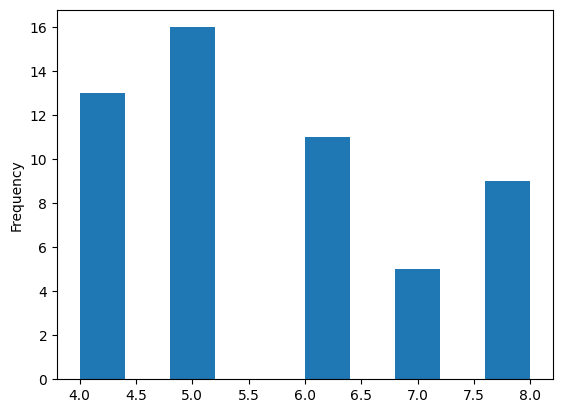

In [ ]:
df['compp'].plot.hist()

Что показывает этот график? Он показывает, сколько студентов получили те или иные оценки. По гистограмме видно, что больше всего по этому курсу оценок 4 и 7.

Можно поменять цвет гистограммы:

<Axes: ylabel='Frequency'>

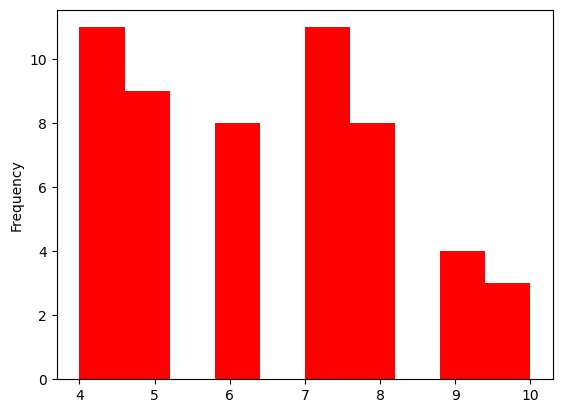

In [ ]:
df['game'].plot.hist(color = 'red')

А также поменять число столбцов и цвет границ столбцов:

<Axes: ylabel='Frequency'>

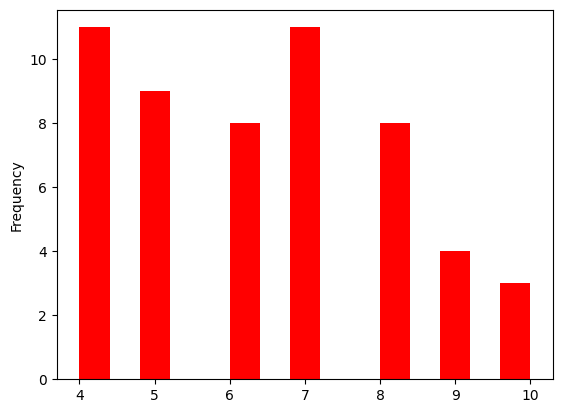

In [ ]:
df['game'].plot.hist(color = 'red', bins = 15)

Можно пытаться строить другие графики. Например, построить ящик с усами (свеча).

<Axes: >

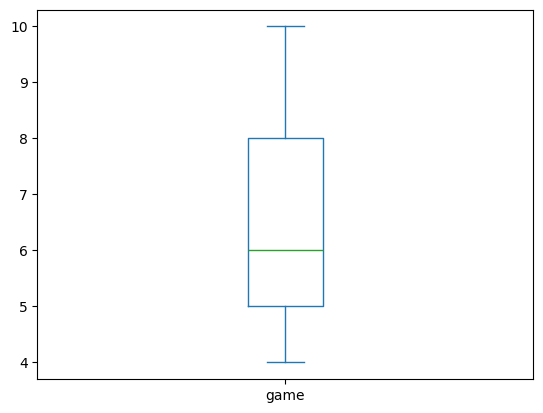

In [ ]:
df['game'].plot.box()

Этот график визуализирует основные описательные статистики переменной и отображает форму её распределения. Нижняя граница ящика – это нижний квартиль, верхняя – верхний квартиль, линяя внутри ящика – медиана. Усы графика могут откладываться по-разному: если в переменной встречаются нетипичные значения (выбросы), то границы усов совпадают с границами типичных значений, если нетипичных значений нет, границы усов соответствуют минимальному и максимальному значению переменной. Подробнее про ящик с усами см. [здесь](https://ru.wikipedia.org/wiki/%D0%AF%D1%89%D0%B8%D0%BA_%D1%81_%D1%83%D1%81%D0%B0%D0%BC%D0%B8).